In [47]:
import pandas as pd
data=pd.read_csv("/content/spam.csv")
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [48]:
data['spam']=data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [49]:
import tensorflow as tf
from tensorflow import keras

In [96]:
import gensim as gm
final=data.Message.apply(gm.utils.simple_preprocess)
model=gm.models.Word2Vec(
      window=15,
      min_count=3,
      workers=3,
)

In [97]:
model.build_vocab(final)
model.train(final, total_examples=model.corpus_count, epochs=model.epochs)

(287711, 392555)

In [98]:
import numpy as np
document_vectors = []
for doc in final:
    word_vectors = [model.wv[word] for word in doc if word in model.wv]
    if word_vectors:
        doc_vector = np.mean(word_vectors, axis=0)  # Compute the mean of word vectors
        document_vectors.append(doc_vector)
    else:
        document_vectors.append(np.zeros(model.vector_size))  # Use zeros for empty documents
X = np.array(document_vectors)
y = data.spam

In [99]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    4825
1    4825
Name: spam, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm)

In [92]:
X_sm.shape

(9650, 100)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(100,)),  # Adjust input shape
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [102]:
document_vectors_dimension = X_train.shape[1]

print("Dimensionality of document vectors:", document_vectors_dimension)

Dimensionality of document vectors: 100


In [103]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
227/227 [==============================] - 3s 3ms/step - loss: 0.3413 - accuracy: 0.8848
Epoch 2/10
227/227 [==============================] - 1s 4ms/step - loss: 0.2257 - accuracy: 0.9128
Epoch 3/10
227/227 [==============================] - 1s 3ms/step - loss: 0.2216 - accuracy: 0.9120
Epoch 4/10
227/227 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9125
Epoch 5/10
227/227 [==============================] - 1s 2ms/step - loss: 0.2143 - accuracy: 0.9192
Epoch 6/10
227/227 [==============================] - 1s 2ms/step - loss: 0.2140 - accuracy: 0.9150
Epoch 7/10
227/227 [==============================] - 1s 2ms/step - loss: 0.2124 - accuracy: 0.9168
Epoch 8/10
227/227 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9208
Epoch 9/10
227/227 [==============================] - 1s 2ms/step - loss: 0.2086 - accuracy: 0.9183
Epoch 10/10
227/227 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9215

In [104]:
model.evaluate(X_test,y_test)

76/76 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9237


[0.20926782488822937, 0.9237463474273682]

In [117]:
predicted=model.predict(X_test)
y_preds=np.round(predicted)


76/76 [==============================] - 0s 2ms/step


In [119]:
from sklearn.metrics import classification_report
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.92      0.93      0.92      1211\n           1       0.93      0.92      0.92      1202\n\n    accuracy                           0.92      2413\n   macro avg       0.92      0.92      0.92      2413\nweighted avg       0.92      0.92      0.92      2413\n'

Text(83.22222222222221, 0.5, 'Truth')

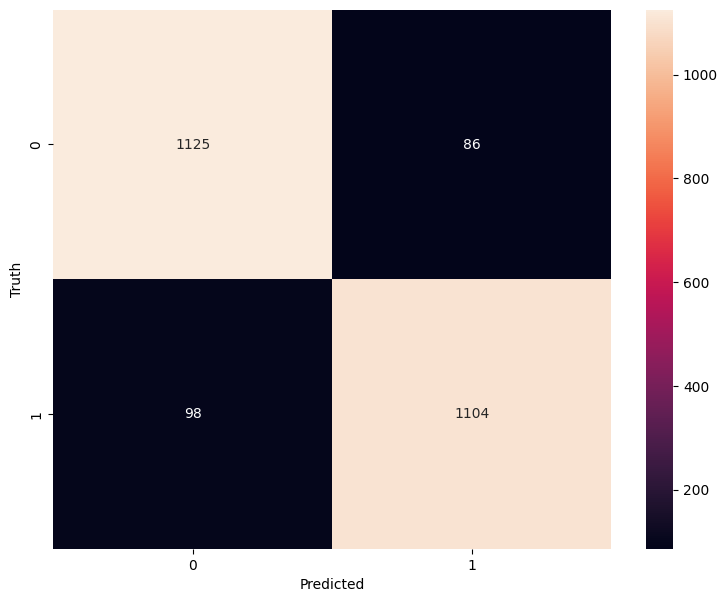

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
plt.figure(figsize = (9,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [124]:
model.predict("Hey mohan, can we get together to watch footbal game tomorrow?")

IndexError: ignored